In [2]:
# import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss


In [3]:
# set random seed for reproducibility
np.random.seed(42)

In [4]:
# load the dataset
titanic_test = pd.read_csv('test.csv')
titanic_test.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
titanic_test.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [7]:
titanic_train = pd.read_csv('train.csv')
titanic_train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


C:\Users\abdik\AppData\Local\Temp\ipykernel_34760\3791293525.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(titanic_train.corr(),annot=True,linewidths=0.2)


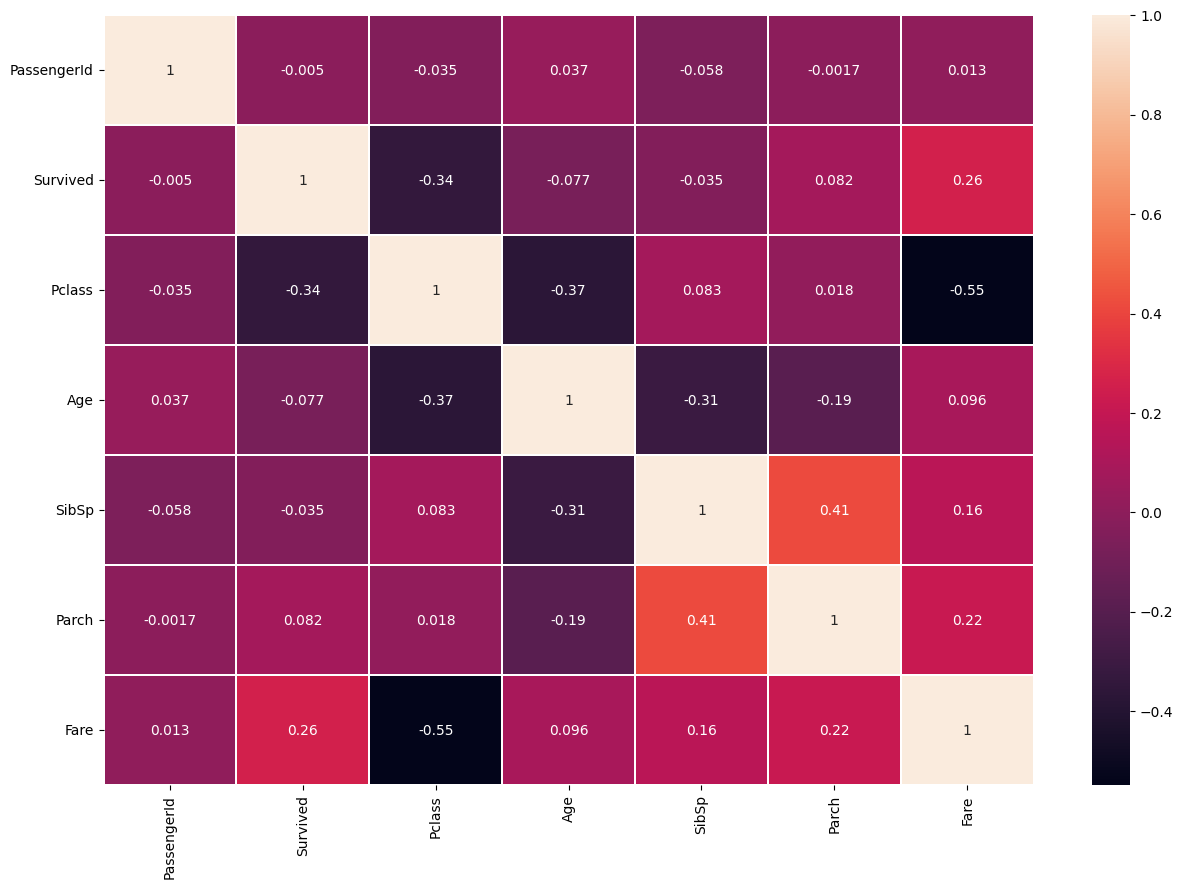

In [9]:
sns.heatmap(titanic_train.corr(),annot=True,linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(15,10)
plt.show()

In [10]:
titanic_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
# create a new variable called train data to fill missing values using median
train_data = titanic_train.fillna(titanic_train['Age'].median(skipna=True))
train_data = train_data.drop(columns='Cabin')
train_data[['Embarked']] = train_data[['Embarked']].replace(to_replace = r'[NaN]', value = str('S'), regex =True)



In [12]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [13]:
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [14]:
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [15]:
titanic_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [16]:
test_data = titanic_test.fillna(titanic_test['Age'].median(skipna=True))
test_data = test_data.fillna(test_data['Fare'].median(skipna=True))
test_data = test_data.drop(columns='Cabin')
test_data[['Embarked']] = test_data[['Embarked']].replace(to_replace = r'[NaN]', value = str('S'), regex =True)

In [17]:
test_data.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

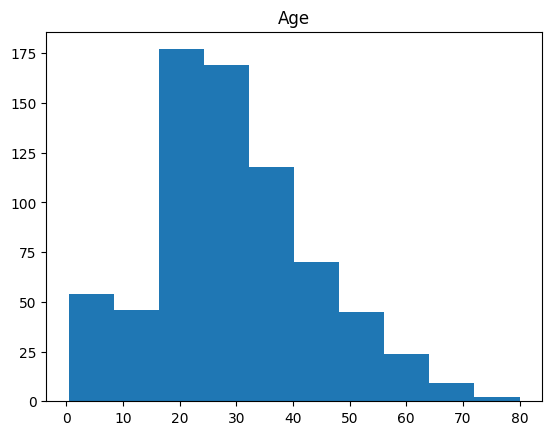

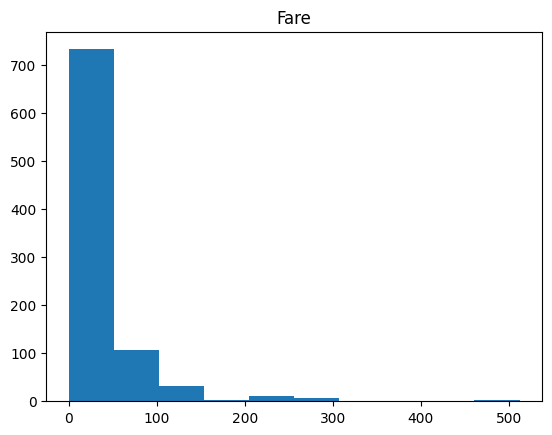

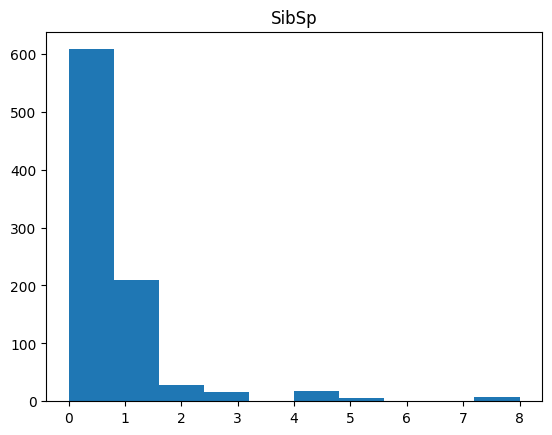

In [18]:
df_num = titanic_train[['Age', 'Fare', 'SibSp']]
df_cat = titanic_train[['Survived', 'Pclass', 'Sex', 'Ticket', 'Cabin', 'Embarked']]

for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

In [19]:
full_data = pd.concat([train_data, test_data], ignore_index=True)

In [20]:
full_data.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

###  Here are the things I did to make a more accurate regression

1. Copy the data in a new DF.
2. Gave numerical values to Sex column, male[=1], and female[=2] 
3. Game numerical values to Embarked column, C[=0], S[=1], Q[=2]
4. Replaced all nan values to 0.
5. Dropped "Name" and "Ticket" column from X values along with "Survived" as they don't make any difference in LR
   as well as they're arbitrary strings anyway which regression doesn't take into account.
6. Changed the max iteration from default to 1000 as we have few columns here. 
   This resulted over 80% accuracy which is a good start.

In [21]:
full_data_temp = full_data
full_data_temp.loc[(full_data_temp.Sex == "male"), "Sex"] = 1
full_data_temp.loc[(full_data_temp.Sex == "female"), "Sex"] = 2
full_data_temp.loc[(full_data_temp.Embarked == "C"), "Embarked"] = 0
full_data_temp.loc[(full_data_temp.Embarked == "S"), "Embarked"] = 1
full_data_temp.loc[(full_data_temp.Embarked == "Q"), "Embarked"] = 2
full_data_temp = full_data_temp.replace(np.nan,0)

In [22]:
# train the data
x = full_data_temp.drop(['Survived', 'Name', 'Ticket'], axis=1)
y = full_data_temp['Survived']

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [25]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(solver='lbfgs', max_iter=1000)
lr_model.fit(x_train, y_train)
score = lr_model.score(x_test, y_test)
score

0.8193384223918575